# Guia 1
## Ejercicio 8
Genere una señal de ruido aleatorio, súmelo a una señal conocida y grafique el resultado. Calcule la potencia de la señal original, la potencia del ruido generado, y calcule la relación señal-ruido (SNR, del inglés signal-to-noise-ratio). Luego multiplique la señal de ruido por una constante y vuelva a calcular la SNR. Por último, a partir de las definiciones de potencia y SNR despeje y calcule el valor para dicha constante de manera que la SNR resultante sea de 0 dB.

### Caso 1

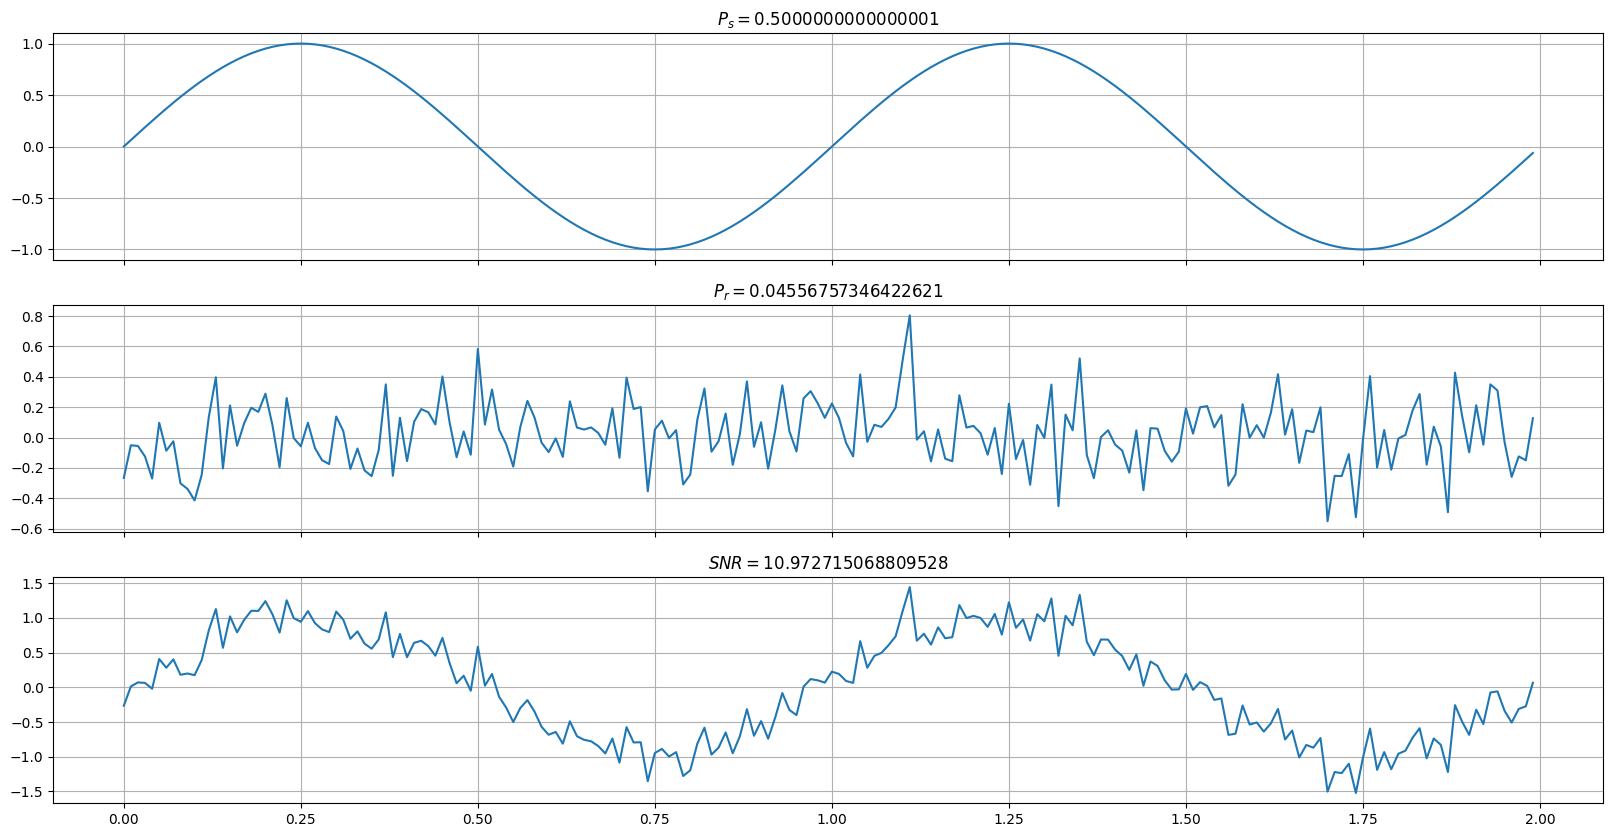

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Generador de una senial senoidal
'''
def senoidal(tini,tfin,fm):
    t = np.linspace(tini,tfin,int(fm*(tfin - tini)), endpoint=False)
    return t, np.sin(2*np.pi*t)

'''
Generador de una senial aleatoria
'''
def aleatoria(tini,tfin,fm,scale):
    t = np.linspace(tini,tfin,int(fm*(tfin-tini)), endpoint=False)
    return t, np.random.normal(0,scale,len(t))

'''
Calcula la potencia de la senial
'''
def potencia(s):
    return np.sum(np.pow(s,[2]*len(s)))/len(s)

tini = 0
tfin = 2
fm = 100
alpha = 1

# senial
t,s = senoidal(tini,tfin,fm)
# ruido
t,r = np.multiply([alpha]*(fm*(tfin-tini)), aleatoria(tini,tfin,fm, 0.2))

fig,ax = plt.subplots(3,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(10)

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].plot(t,s)
ax[0].set_title(f"$P_s = {potencia(s)}$")

ax[1].plot(t,r)
ax[1].set_title(f"$P_r = {potencia(r)}$")

ax[2].plot(t,s+r)
ax[2].set_title(f"$SNR = {potencia(s)/potencia(r)}$")

plt.show()

### Caso 2

Señal de ruido multiplicada por 2

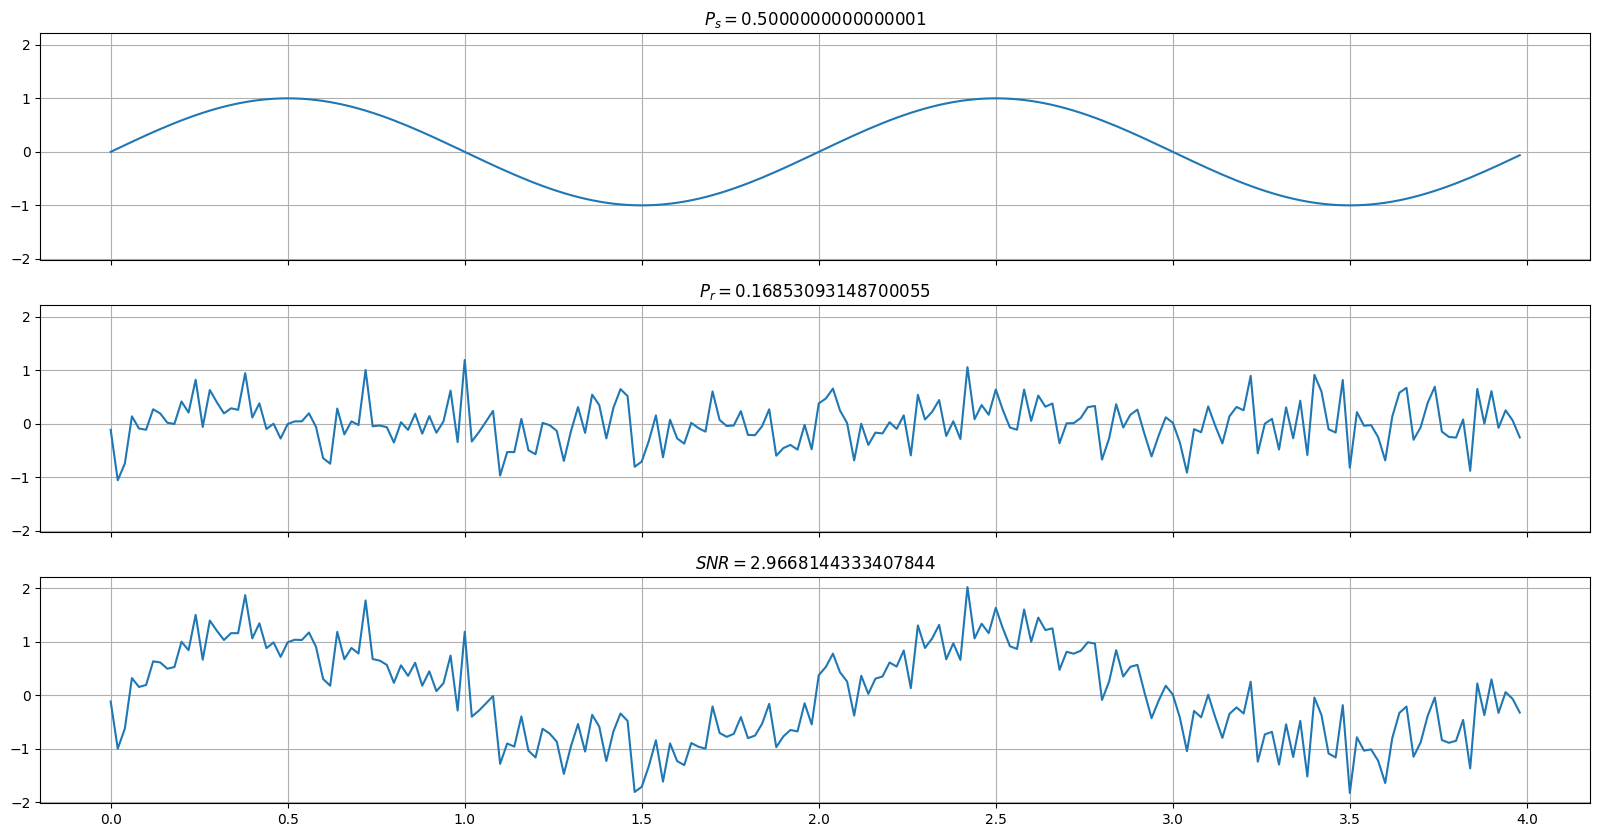

In [2]:
tini = 0
tfin = 2
fm = 100
alpha = 2

# senial
t,s = senoidal(tini,tfin,fm)
# ruido
t,r = np.multiply([alpha]*(fm*(tfin-tini)), aleatoria(tini,tfin,fm, 0.2))

fig,ax = plt.subplots(3,sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].plot(t,s)
ax[0].set_title(f"$P_s = {potencia(s)}$")

ax[1].plot(t,r)
ax[1].set_title(f"$P_r = {potencia(r)}$")

ax[2].plot(t,s+r)
ax[2].set_title(f"$SNR = {potencia(s)/potencia(r)}$")

plt.show()

### Caso 3

Despeje y calcule $\alpha$ para una SNR de 0 dB

$$ SNR \text{ dB} = 10 log_{10} \left( \frac{P_s}{P_r} \right) \text{, } P(\alpha r) = \alpha P_r$$
$$ SNR_1 \text{ dB} = 10 log_{10} \left( \frac{P_s}{\alpha P_r} \right) $$
Queremos que la nueva SNR sea cero
$$ 0 = 10 log_{10} \left( \frac{P_s}{\alpha P_r} \right) \text{, } SNR_1 = 0 $$
$$ 0 = log_{10} \left( \frac{P_s}{\alpha P_r} \right) $$
$$ 10^0 = \frac{P_s}{\alpha P_r} $$
$$ 1 = \frac{P_s}{\alpha P_r} $$
$$ \alpha = \frac{P_s}{P_r} $$

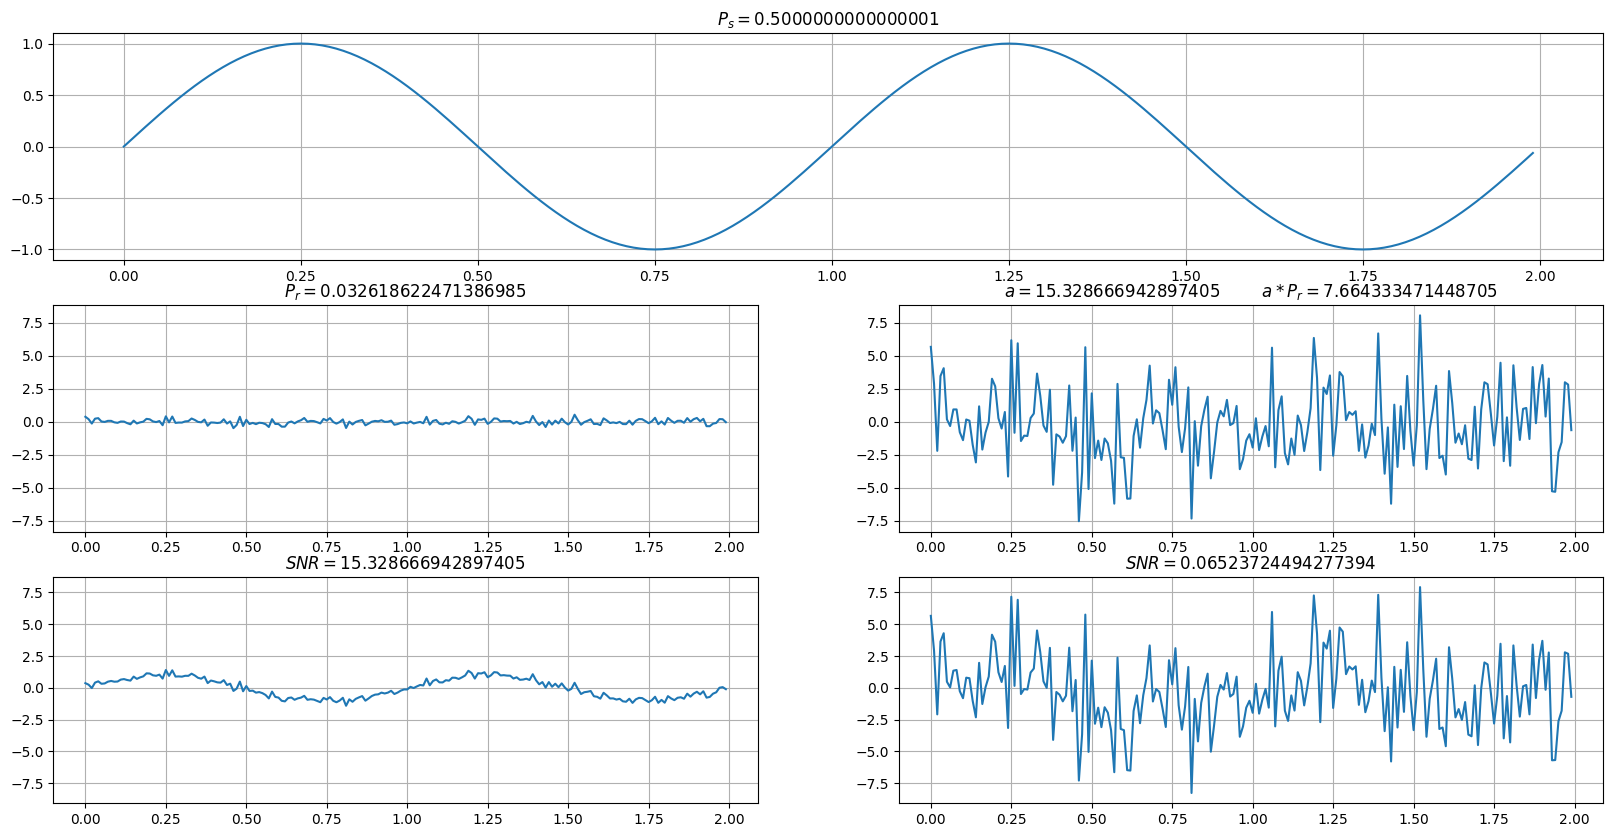

In [3]:
tini = 0
tfin = 2
fm = 100
alpha = 2

# senial
t,s = senoidal(tini,tfin,fm)
# ruido
t,r = aleatoria(tini,tfin,fm, 0.2)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

ax0 = plt.subplot2grid((3,2), (0,0), colspan=2)
ax1 = plt.subplot2grid((3,2), (1,0))
ax2 = plt.subplot2grid((3,2), (2,0))
ax3 = plt.subplot2grid((3,2), (1,1), sharey=ax1)
ax4 = plt.subplot2grid((3,2), (2,1), sharey=ax2)

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

# senial
ax0.plot(t,s)
ax0.set_title(f"$P_s = {potencia(s)}$")

# ruido 1
ax1.plot(t,r)
ax1.set_title(f"$P_r = {potencia(r)}$")

# suma 1
ax2.plot(t,s+r)
ax2.set_title(f"$SNR = {potencia(s)/potencia(r)}$")

# ruido 2
alpha = potencia(s)/potencia(r)                 # calculo de constante
r2 = np.multiply([alpha]*(fm*(tfin-tini)), r)   # ruido escalado
ax3.plot(t,r2)
ax3.set_title(f"$ a = {alpha}$        $a * P_r = {potencia(r2)}$")

# suma 2
ax4.plot(t,s+r2)
ax4.set_title(f"$SNR = {potencia(s)/potencia(r2)}$")

plt.show()